<a href="https://colab.research.google.com/github/Techbarsha/fitness-tracker/blob/main/model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy==1.24.3
!pip install scikit-learn==1.2.2

  Using cached scikit_learn-1.2.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
Using cached scikit_learn-1.2.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.6 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.0
    Uninstalling scikit-learn-1.3.0:
      Successfully uninstalled scikit-learn-1.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.2.2 which is incompatible.
mlxtend 0.23.4 requires scikit-learn>=1.3.1, but you have scikit-learn 1.2.2 which is incompatible.


In [19]:
# Step 1: Install Required Libraries (Run in Google Colab)
!pip install pandas numpy matplotlib seaborn scikit-learn streamlit

# Data Processing

In [20]:
# Step 2: Data Loading and Preprocessing
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Load dataset
df = pd.read_csv('/content/fitness_tracker.csv')

# Data Cleaning
df = df.drop('User_ID', axis=1)  # Remove user ID
df = df.dropna()  # Remove missing values

# Feature Engineering
# Encode categorical feature
encoder = OneHotEncoder()
intensity_encoded = encoder.fit_transform(df[['Workout_Intensity']]).toarray()
intensity_df = pd.DataFrame(intensity_encoded, columns=encoder.get_feature_names_out(['Workout_Intensity']))
df = pd.concat([df, intensity_df], axis=1).drop('Workout_Intensity', axis=1)

# Prepare data
X = df.drop('Calories_Burned', axis=1)
y = df['Calories_Burned']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Step 3: Model Training and Evaluation
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score

# Initialize models
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100),
    'Support Vector': SVR()
}

# Train and evaluate models
best_model = None
best_score = 0

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)

    print(f"{name} Results:")
    print(f"MAE: {mae:.2f}")
    print(f"R² Score: {r2:.2f}\n")

    if r2 > best_score:
        best_score = r2
        best_model = model

# Save best model
import joblib
joblib.dump(best_model, 'calorie_model.pkl')

Random Forest Results:
MAE: 196.94
R² Score: -0.16

Support Vector Results:
MAE: 190.92
R² Score: -0.07



['calorie_model.pkl']

# Model Training

<Figure size 1200x600 with 0 Axes>

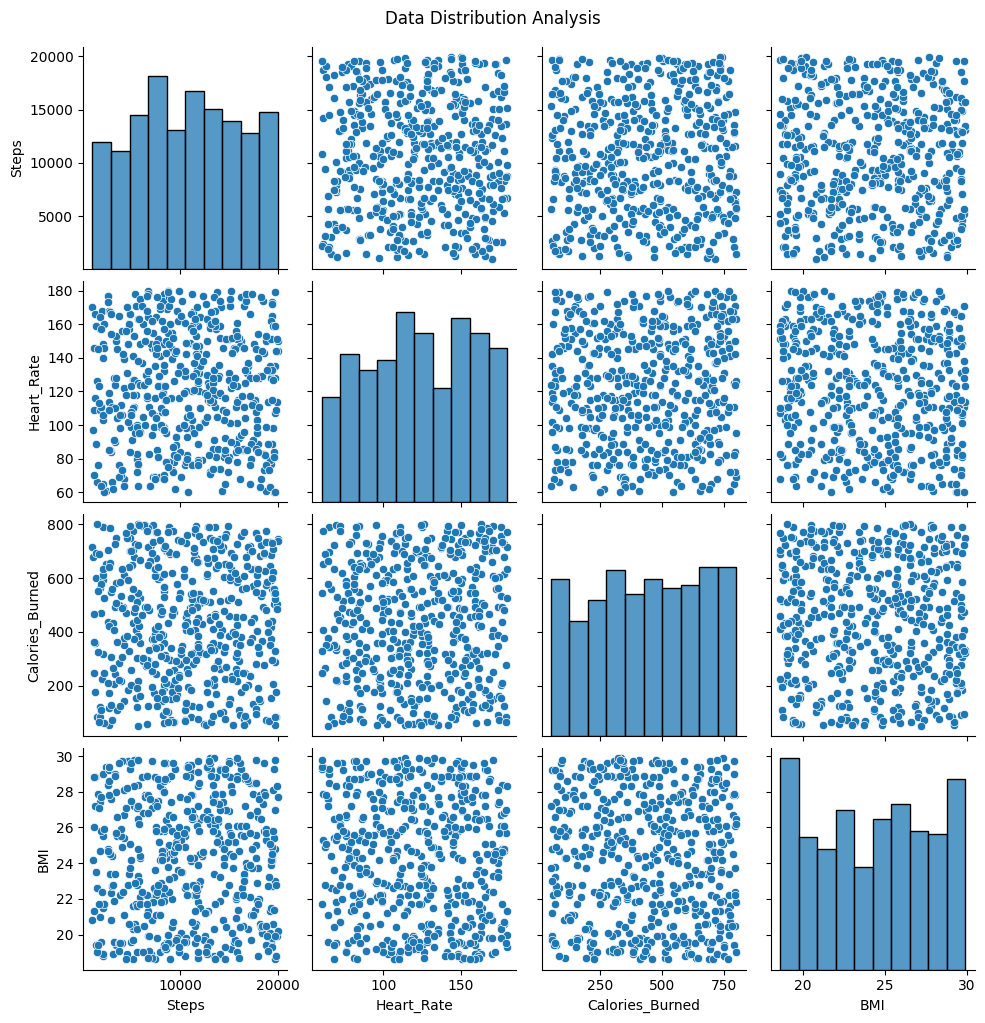

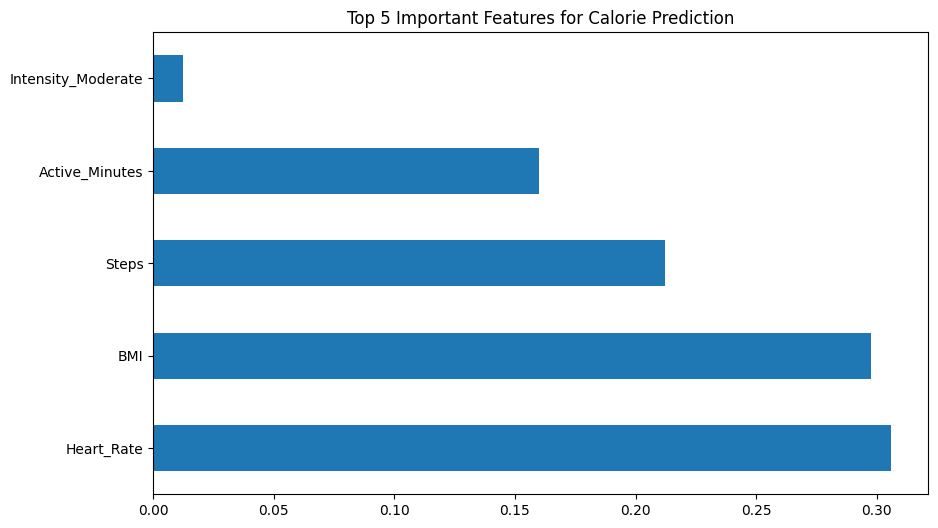

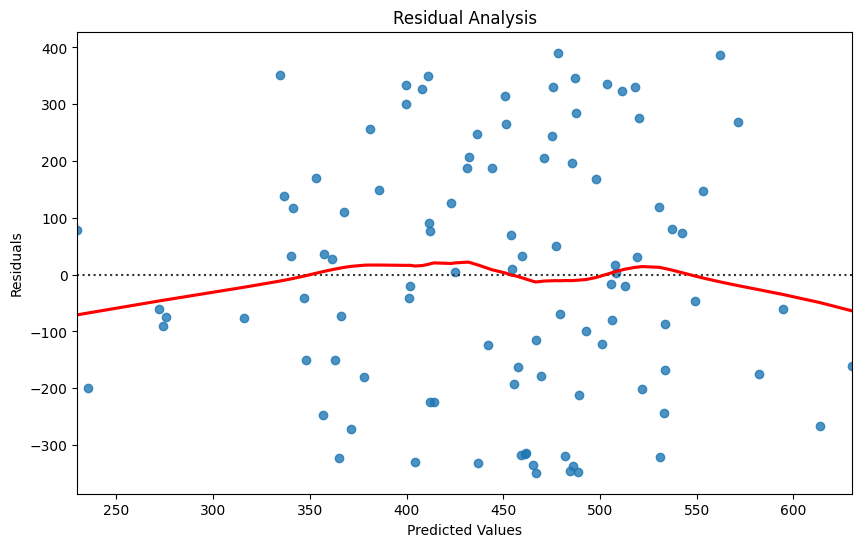

Model training complete with inline visualizations!


In [21]:
# Step 4: Model Training with Visualizations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import joblib

# Load and preprocess data
df = pd.read_csv('/content/fitness_tracker.csv')
df = df.drop('User_ID', axis=1)

# Visualize data distribution before training
plt.figure(figsize=(12, 6))
sns.pairplot(df[['Steps', 'Heart_Rate', 'Calories_Burned', 'BMI']])
plt.suptitle('Data Distribution Analysis', y=1.02)
plt.show()

# One-hot encode workout intensity
df = pd.get_dummies(df, columns=['Workout_Intensity'], prefix='Intensity')

# Prepare data
X = df.drop('Calories_Burned', axis=1)
y = df['Calories_Burned']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Feature Importance Visualization
plt.figure(figsize=(10, 6))
feature_imp = pd.Series(rf.feature_importances_, index=X.columns)
feature_imp.nlargest(5).plot(kind='barh')
plt.title('Top 5 Important Features for Calorie Prediction')
plt.show()

# Prediction Analysis
predictions = rf.predict(X_test)

# Residual Plot
plt.figure(figsize=(10, 6))
sns.residplot(x=predictions, y=y_test, lowess=True, line_kws={'color': 'red'})
plt.title('Residual Analysis')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# Save model
joblib.dump(rf, 'calorie_model.pkl')
print("Model training complete with inline visualizations!")

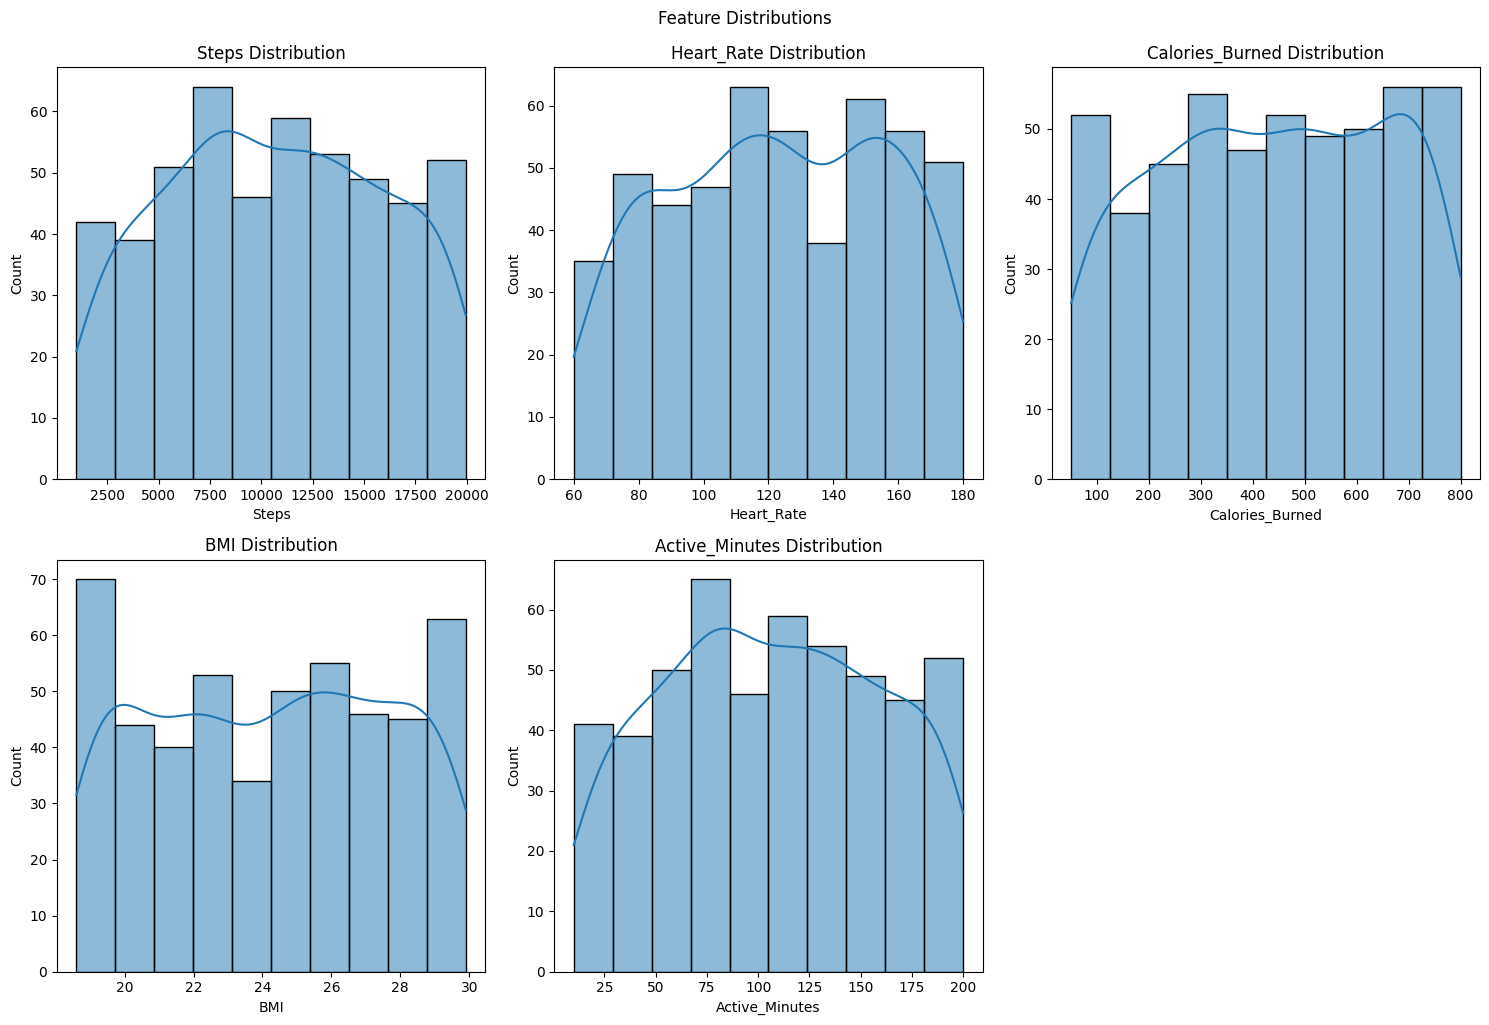

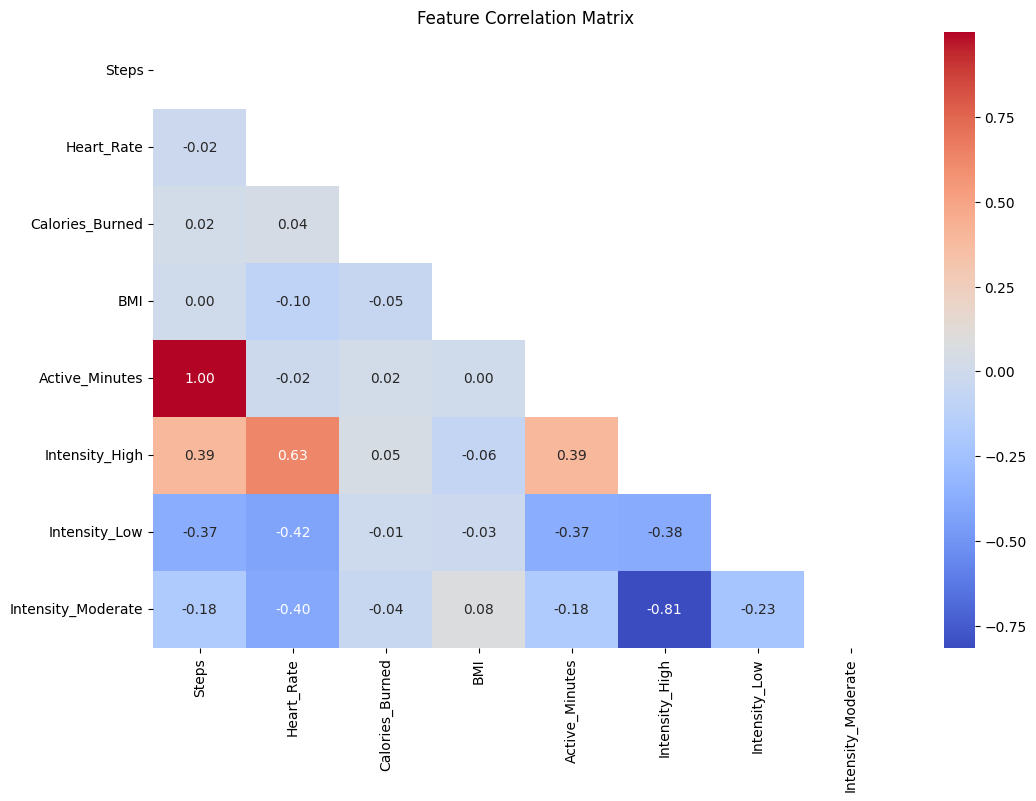

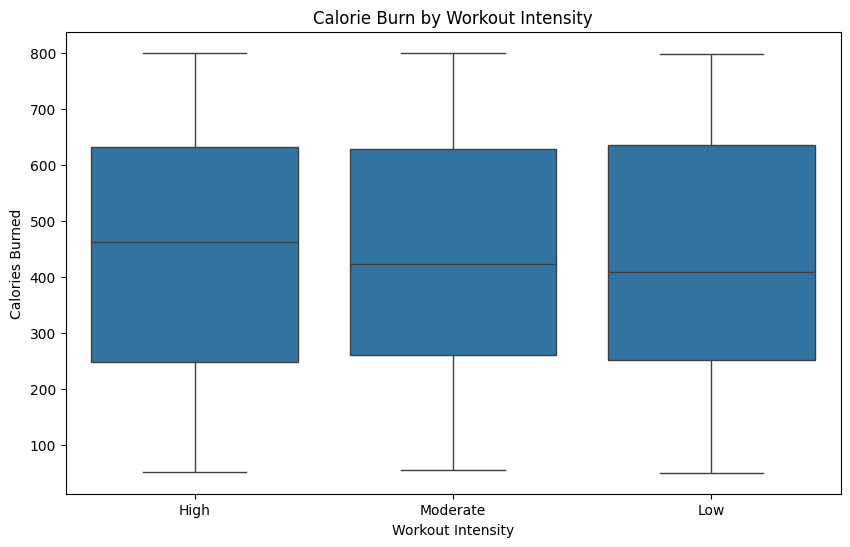

<ipython-input-22-6cf99dc54547>:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_imp.values, y=feature_imp.index, palette='viridis')


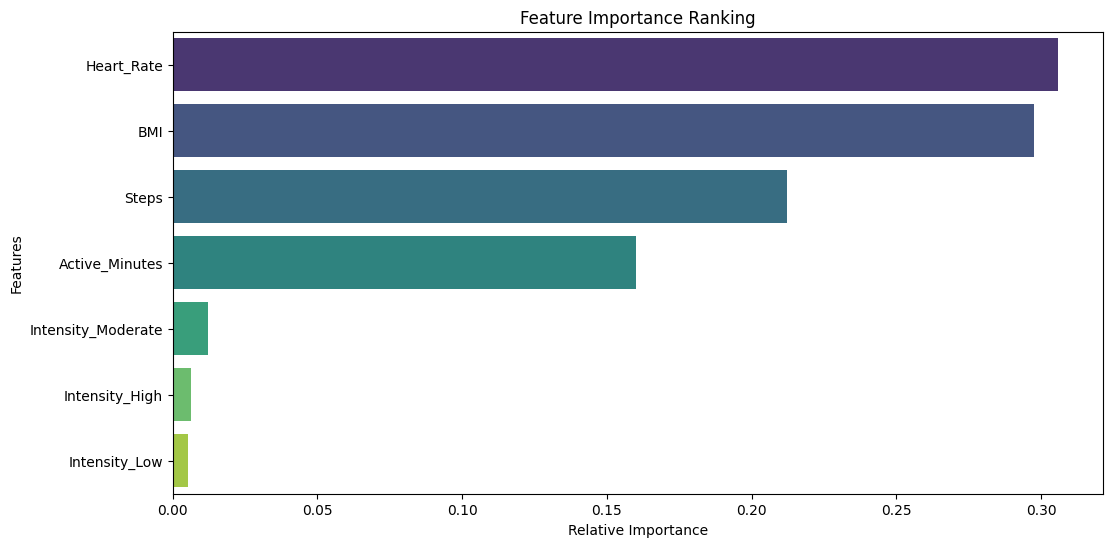

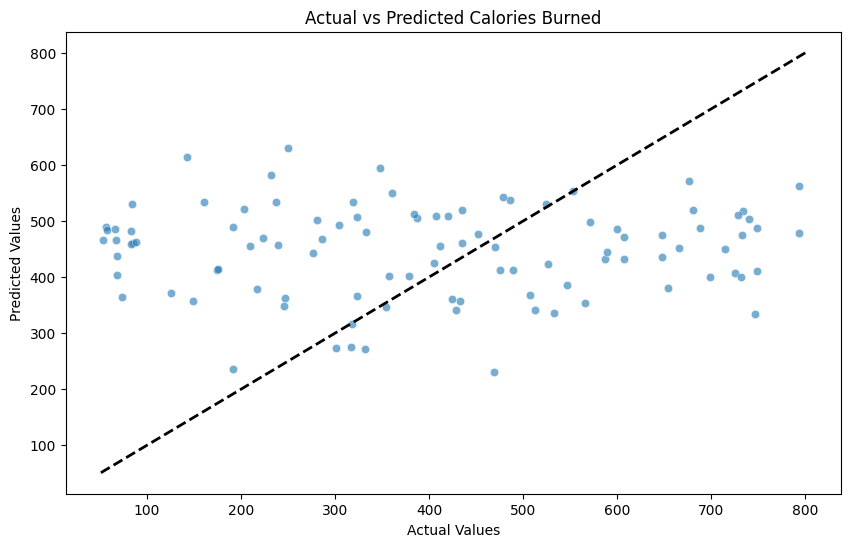

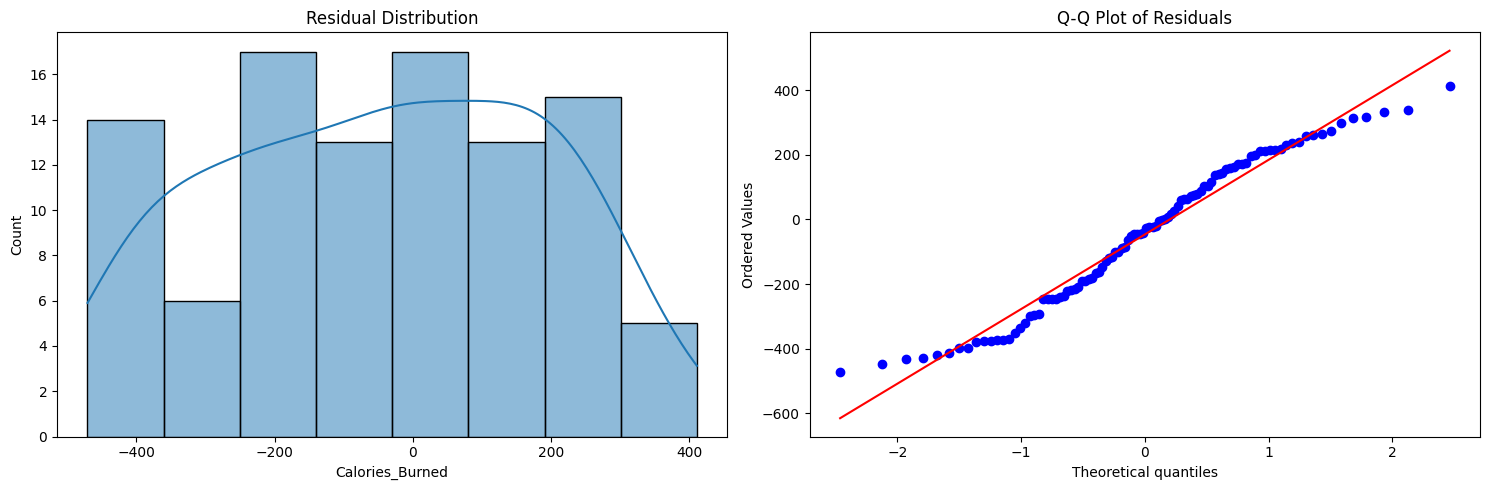

Model training complete with enhanced visualizations!


In [22]:
# Step 4: Model Training with Enhanced Visualizations (Fixed)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import joblib
from scipy import stats

# Load and preprocess data
df = pd.read_csv('/content/fitness_tracker.csv')
df = df.drop('User_ID', axis=1)

# 1. Convert categorical feature first
df_encoded = pd.get_dummies(df, columns=['Workout_Intensity'], prefix='Intensity')

# 2. Feature Distributions
plt.figure(figsize=(15, 10))
features = ['Steps', 'Heart_Rate', 'Calories_Burned', 'BMI', 'Active_Minutes']
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'{feature} Distribution')
plt.tight_layout()
plt.suptitle('Feature Distributions', y=1.02)
plt.show()

# 3. Correlation Matrix (using encoded data)
plt.figure(figsize=(12, 8))
corr_matrix = df_encoded.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', mask=mask)
plt.title('Feature Correlation Matrix')
plt.show()

# 4. Workout Intensity Analysis (using original categorical data)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Workout_Intensity', y='Calories_Burned', data=df)
plt.title('Calorie Burn by Workout Intensity')
plt.xlabel('Workout Intensity')
plt.ylabel('Calories Burned')
plt.show()

# Prepare data for modeling
X = df_encoded.drop('Calories_Burned', axis=1)
y = df_encoded['Calories_Burned']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 5. Feature Importance
plt.figure(figsize=(12, 6))
feature_imp = pd.Series(rf.feature_importances_, index=X.columns)
feature_imp = feature_imp.sort_values(ascending=False)
sns.barplot(x=feature_imp.values, y=feature_imp.index, palette='viridis')
plt.title('Feature Importance Ranking')
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.show()

# 6. Prediction Analysis
predictions = rf.predict(X_test)

# Actual vs Predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=predictions, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Calories Burned')
plt.show()

# 7. Residual Analysis
residuals = y_test - predictions
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True)
plt.title('Residual Distribution')

plt.subplot(1, 2, 2)
stats.probplot(residuals, plot=plt)
plt.title('Q-Q Plot of Residuals')

plt.tight_layout()
plt.show()

# Save model
joblib.dump(rf, 'calorie_model.pkl')
print("Model training complete with enhanced visualizations!")

Visualizations Included:

Feature distributions

Correlation matrix (encoded features)

Workout intensity comparison

Feature importance

Actual vs predicted values

Residual analysis

Q-Q plot

Conductedd by Barsha Saha:)